In [ ]:
pip install opendatasets

In [ ]:
pip install snapml

In [ ]:
import opendatasets as od
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import roc_auc_score
import time
import warnings

In [ ]:
# for using the dataset follow the steps
# 1) - go to kaggle and create your account
# 2) - click on your profile and go to settings
# 3) - inside setting click on create new token(a json file will be generated)
# 4) - upload the json file and follow the next steps to use the dataset

# another way
# download the dataset from kaggle
# link - https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"vineet13502","key":"1241aa739f1b1d5ec6d46ed5d92a11fc"}'}

In [ ]:
od.download("https://www.kaggle.com/mlg-ulb/creditcardfraud")

Skipping, found downloaded files in "./creditcardfraud" (use force=True to force download)


In [ ]:
df=pd.read_csv('creditcardfraud/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.shape

(284807, 31)

In [ ]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
# a financial institution may have access to a large dataset to replicate such a case we create copies of the dataset and inflate it
replicas=10
raw_data=pd.DataFrame(np.repeat(df.values,replicas,axis=0), columns=df.columns)

print(str(len(raw_data)))
print(str(len(raw_data.columns)))

raw_data.head()

2848070
31


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
2,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
3,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
4,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0


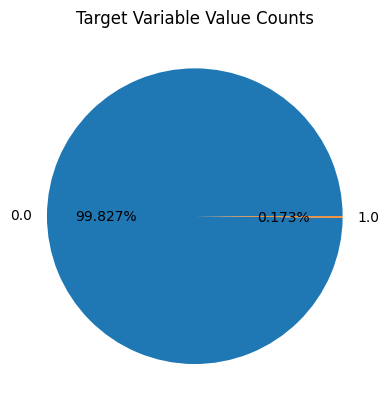

In [ ]:
#we find the number of values in each class

labels = raw_data.Class.unique()

# get the count of each class
sizes = raw_data.Class.value_counts().values

# plot the class value counts
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.3f%%')
ax.set_title('Target Variable Value Counts')
plt.show()

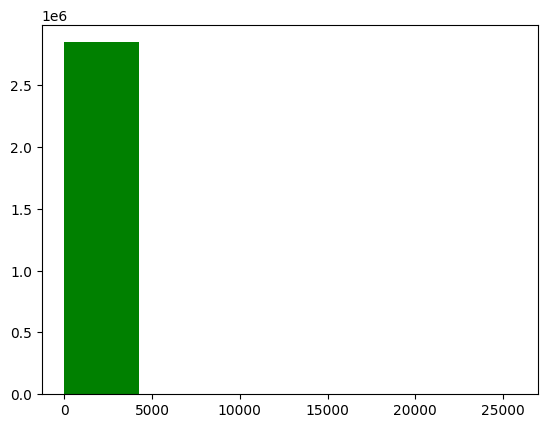

In [ ]:
plt.hist(raw_data.Amount.values, 6, histtype='bar', facecolor='g')
plt.show()

In [ ]:
# we use all the columns as features besides 'Time' and 'Class' for prediction
X=np.asanyarray(df[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']])

In [ ]:
X

array([[-1.35980713e+00, -7.27811733e-02,  2.53634674e+00, ...,
         1.33558377e-01, -2.10530535e-02,  1.49620000e+02],
       [ 1.19185711e+00,  2.66150712e-01,  1.66480113e-01, ...,
        -8.98309914e-03,  1.47241692e-02,  2.69000000e+00],
       [-1.35835406e+00, -1.34016307e+00,  1.77320934e+00, ...,
        -5.53527940e-02, -5.97518406e-02,  3.78660000e+02],
       ...,
       [ 1.91956501e+00, -3.01253846e-01, -3.24963981e+00, ...,
         4.45477214e-03, -2.65608286e-02,  6.78800000e+01],
       [-2.40440050e-01,  5.30482513e-01,  7.02510230e-01, ...,
         1.08820735e-01,  1.04532821e-01,  1.00000000e+01],
       [-5.33412522e-01, -1.89733337e-01,  7.03337367e-01, ...,
        -2.41530880e-03,  1.36489143e-02,  2.17000000e+02]])

In [ ]:
# we standardize the data by removing the mean and scaling to unit variance
X=StandardScaler().fit_transform(X)

In [ ]:
# data normalization

X = normalize(X, norm="l1")

In [ ]:
y=df['Class']
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [ ]:
# we use 30% data for testing
# When stratify is set to a variable (in this case, y),
# it means that the data will be split in a way that preserves the percentage of samples for each class in the target variable.
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)
print("training set: ",X_train.shape,y_train.shape)
print("testing set: ",X_test.shape,y_test.shape)

training set:  (199364, 29) (199364,)
testing set:  (85443, 29) (85443,)


In [ ]:
# here we try to balance the dataset
# The compute_sample_weight function in scikit-learn provides a way to assign weights to each sample in the training set,
# and the 'balanced' strategy aims to balance the contribution of different classes.

w_train = compute_sample_weight('balanced', y_train)

In [ ]:
# here we create a decision tree using sklearn
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
import time

dtree=DecisionTreeClassifier(criterion='entropy',max_depth=4)
print(dtree)

t0=time.time()

dtree.fit(X_train,y_train,sample_weight=w_train)
sklearn_time = time.time()-t0

print("[Scikit-Learn] Training time:  {0:.5f}".format(sklearn_time))

DecisionTreeClassifier(criterion='entropy', max_depth=4)
[Scikit-Learn] Training time:  17.65103


In [ ]:
pred=dtree.predict(X_test)
pred

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
from sklearn import metrics
print("accuracy : ",metrics.accuracy_score(y_test,pred))


accuracy :  0.9408845663190665


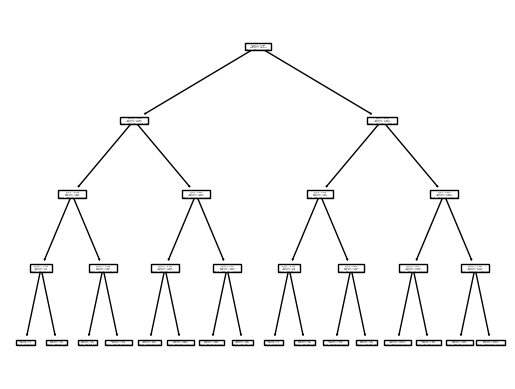

In [ ]:
tree.plot_tree(dtree)
plt.show()

In [ ]:
# now we use IBMs snapML library for building the tree
from snapml import DecisionTreeClassifier
snapDtree= DecisionTreeClassifier(max_depth=4, random_state=45, n_jobs=4)

snapDtree.fit(X_train,y_train,sample_weight=w_train)
snapPred=snapDtree.predict(X_test)

print("accuracy : ",metrics.accuracy_score(y_test,snapPred))

accuracy :  0.9778448790421684


In [ ]:
from snapml import SupportVectorMachine

snapml_svm = SupportVectorMachine(class_weight='balanced', random_state=25, n_jobs=4, fit_intercept=False)

t0 = time.time()
model = snapml_svm.fit(X_train, y_train)

snapml_time = time.time()-t0
print("[Snap ML] Training time :  {0:.5f}".format(snapml_time))



[Snap ML] Training time :  5.35321


In [ ]:
# we observe that the training time for decision tree using snapML is much faster as compared to Scikit-Learn decision tree
# using snapML we can run the algorithm parallely thus increasing efficiency

In [ ]:
snapml_pred=snapml_svm.decision_function(X_test)

acc_snapml  = roc_auc_score(y_test, snapml_pred)
print("ROC-AUC score:   {0:.3f}".format(acc_snapml))

ROC-AUC score:   0.972


In [ ]:
from sklearn.metrics import hinge_loss
loss_snapml = hinge_loss(y_test, snapml_pred)
print("Hinge loss:   {0:.3f}".format(loss_snapml))

Hinge loss:   0.564
